# 1. Importação dos ficheiros e merge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [14]:
data_labels_excel = pd.read_excel('data_labels.xlsx', index_col=None)
data_store_excel = pd.read_excel('data_store.xlsx', index_col=None)

In [22]:
data_labels_excel.to_csv('data_labels.csv', index=False)
data_store_excel.to_csv('data_store.csv', index=False)


In [23]:
data_labels = pd.read_csv('data_labels.csv', low_memory=False)

data_store = pd.read_csv('data_store.csv')

In [24]:
data_labels.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN


In [25]:
data_store.head()

,idstore,type,selling_square_ft,district
0,1,Large,4762.0,Évora
1,2,Large,12358.0,Bragança
2,3,Large,16159.0,Lisboa
3,4,Large,17903.0,Porto
4,5,Large,16179.0,Coimbra


In [26]:
db = data_labels.merge(data_store, on = 'idstore' )

In [27]:
db.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora


# 2. Exploração inicial

Problemas detetados:

*   brand's com marcas iguais mas de forma diferente (Ex.: marca 1,  marca  1, Marca1, etc)
*   oldpvp com alguns valores separados por "," e outros por "."; sem duas casas decimais também
*   newpvp sem 2 casas decimais também
*   payment method vazio quando não foi sold - a trocar
*   perc_expiring_sku com formatações diferentes também (alguns com 5% por exemplo)
*   expiring_date, labelling_date e selling date com formatos diferentes






In [28]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   idstore             150054 non-null  int64  
 1   sku                 150054 non-null  int64  
 2   brand               150054 non-null  object 
 3   oldpvp              150032 non-null  object 
 4   new_pvp (discount)  150026 non-null  object 
 5   labelqty            150054 non-null  int64  
 6   weight (g)          150050 non-null  object 
 7   Payment_method      150054 non-null  object 
 8   Margin (%)          150054 non-null  int64  
 9   Profit (€)          150054 non-null  float64
 10  perc_expiring_sku   149929 non-null  float64
 11  expiring_date       150054 non-null  object 
 12  labelling_date      150054 non-null  object 
 13  sell_date           80511 non-null   object 
 14  sold                149940 non-null  float64
 15  type                150054 non-nul

In [988]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'new_pvp (discount)', 'labelqty',
       'weight (g)', 'Payment_method', 'Margin (%)', 'Profit (€)',
       'perc_expiring_sku', 'expiring_date', 'labelling_date', 'sell_date',
       'sold', 'type', 'selling_square_ft', 'district'],
      dtype='object')

In [989]:
db[db.duplicated()]

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
36,7,2,Marca2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
39,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
41,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
42,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
43,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150034,177,318,Marca2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaN,0.0,Small,842.0,Porto
150036,177,318,Marca 2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaN,0.0,Small,842.0,Porto
150038,177,318,Marca 2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaN,0.0,Small,842.0,Porto
150048,193,318,Marca 2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.100629,19-10-2021,2021-10-03,2021-10-09,1.0,Medium,5048.0,Viseu


várias pessoas podem comprar o mesmo produto, na mesma loja, no mesmo dia, pelo que não iremos apagar os duplicados

##2.1 Tratamento de problemas de formatação

In [990]:
db['brand'].value_counts()

,count
brand,
marca 2,18249
Marca 2,17008
marca 2,9077
marca 2,9068
marca2,9043
...,...
Marca 37,1
Marca 37,1
marca 39,1


In [991]:
db['brand'] = db['brand'].str.lower()
db['brand'] = db['brand'].str.replace(' ', '')
db['brand'].value_counts()

,count
brand,
marca2,106163
marca7,15428
marca15,12543
marca5,5418
marca12,1760
marca25,1279
marca9,1126
marca3,880
marca33,846


In [992]:
db['brand'].value_counts()

,count
brand,
marca2,106163
marca7,15428
marca15,12543
marca5,5418
marca12,1760
marca25,1279
marca9,1126
marca3,880
marca33,846


In [993]:
db['brand'].unique()

array(['marca1', 'marca2', 'marca3', 'marca4', 'marca5', 'marca6',
       'marca7', 'marca8', 'marca9', 'marca10', 'marca11', 'marca12',
       'marca13', 'marca14', 'marca15', 'marca16', 'marca17', 'marca18',
       'marca19', 'marca20', 'marca21', 'marca22', 'marca23', 'marca24',
       'marca25', 'marca26', 'marca27', 'marca28', 'marca29', 'marca30',
       'marca31', 'marca32', 'marca33', 'marca34', 'marca35', 'marca36',
       'marca37', 'marca38', 'marca39', 'marca40', 'marca41', 'marca42'],
      dtype=object)

In [32]:
db['oldpvp'] = db['oldpvp'].str.replace(',', '.')

In [33]:
db['oldpvp'].unique()

array(['4.22', '3.96', '4.74', '4.2', '4.62', '3.42', '3.62', '4.38',
       '5.23', '5.89', '3.78', '4.76', '3.19', nan, '2.65', '2.79', '500',
       '46', '2.99', '1.39', '2.19', '1.19', '1.25', '3.99', '4.29',
       '1.99', '0.79', '1.29', '1.79', '1.15', '2.69', '2.49', '2.59',
       '4.39', '4.59', '1.49', '0.99', '4.99', '17.99', '2.39', '0.69',
       '0.76', '2.95', '1.59', '1.95', '1.89', '3.29', '2.80', '4.15',
       '1.69', '3.39', '3.24', '2.89', '1.75', '2.29', '999', '0.95',
       '1.54', '1.09', '3.49', '0.96', '0.98', '0.97', '1', '2.75',
       '1.05', '3.35', '0.89', '0.85', '1.55', '1.12', '1.47', '1.22',
       '1.71', '1.36', '1.68', '1.78', '1.5', '1.61', '1.33', '1.57',
       '1.26', '1.43', '1.08', '2.1', '0.91', '1.4', '2.03', '0.84',
       '0.94', '2.5', '2.50', '2.09', '14.99', '0.59', '1.65', '3.8',
       '2.45', '4.89', '3.09', '1.9', '1.44'], dtype=object)

In [34]:
# prompt: quero colocar todos os valores de db['oldpvp'] com duas casas decimais

db['oldpvp'] = db['oldpvp'].astype(float).round(2)


In [997]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'new_pvp (discount)', 'labelqty',
       'weight (g)', 'Payment_method', 'Margin (%)', 'Profit (€)',
       'perc_expiring_sku', 'expiring_date', 'labelling_date', 'sell_date',
       'sold', 'type', 'selling_square_ft', 'district'],
      dtype='object')

In [35]:
# prompt: quero separa a coluna new_pvp (discount) em duas colunas: a new_pvp e a discount; sendo que quero que seja separado por new_pvp até ao "(" e a discount a partir do "(" inclusivamente

# Assuming 'new_pvp' column exists and has the format you described.
db[['new_pvp', 'discount']] = db['new_pvp (discount)'].str.split('(', expand=True)
db['new_pvp'] = db['new_pvp'].str.strip()
#db['discount'] = '(' + db['discount'] # put ( back
db['discount'] = db['discount'].str.rstrip(')') # remove ) from the end



In [36]:
db.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.50
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.50
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.50
3,1,1,Marca 1,4.20,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.1,0.50
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.50


In [37]:
db['new_pvp'] = db['new_pvp'].str.replace(',', '.')
db['new_pvp'] = db['new_pvp'].astype(float).round(2)

In [38]:

# Function to convert discount to numeric format
def convert_discount(discount_str):
    if isinstance(discount_str, str):
        if '%' in discount_str:
            try:
                return float(discount_str.replace('%', '')) / 100
            except ValueError:
                return np.nan  # Handle cases with invalid percentage values
        elif discount_str == 'nan':
            return np.nan
        else:
          try:
            return float(discount_str)
          except:
            return np.nan
    elif pd.isna(discount_str):
      return np.nan
    else:
        return discount_str

db['discount'] = db['discount'].apply(convert_discount)
db['discount'] = db['discount'].astype(float).round(2)

In [39]:
db = db.drop('new_pvp (discount)', axis=1)

In [1003]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'Payment_method', 'Margin (%)', 'Profit (€)', 'perc_expiring_sku',
       'expiring_date', 'labelling_date', 'sell_date', 'sold', 'type',
       'selling_square_ft', 'district', 'new_pvp', 'discount'],
      dtype='object')

In [40]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idstore            150054 non-null  int64  
 1   sku                150054 non-null  int64  
 2   brand              150054 non-null  object 
 3   oldpvp             150032 non-null  float64
 4   labelqty           150054 non-null  int64  
 5   weight (g)         150050 non-null  object 
 6   Payment_method     150054 non-null  object 
 7   Margin (%)         150054 non-null  int64  
 8   Profit (€)         150054 non-null  float64
 9   perc_expiring_sku  149929 non-null  float64
 10  expiring_date      150054 non-null  object 
 11  labelling_date     150054 non-null  object 
 12  sell_date          80511 non-null   object 
 13  sold               149940 non-null  float64
 14  type               150054 non-null  object 
 15  selling_square_ft  139275 non-null  float64
 16  di

In [1004]:
db['Profit (€)'] = db['Profit (€)'].astype(float).round(2)

In [41]:
db['Margem_num']=db['Margin (%)']/100
db = db.drop('Margin (%)', axis=1)

In [42]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,Marca 1,4.22,1,260,Card,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,Marca 1,3.96,1,260,,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,Marca 1,4.74,1,260,Cash,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,Marca 1,4.20,1,260,Card,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,Marca 1,4.62,1,260,Cash,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5,0.16


In [47]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idstore            150054 non-null  int64  
 1   sku                150054 non-null  int64  
 2   brand              150054 non-null  object 
 3   oldpvp             150032 non-null  float64
 4   labelqty           150054 non-null  int64  
 5   weight (g)         150050 non-null  object 
 6   Payment_method     150054 non-null  object 
 7   Profit (€)         150054 non-null  float64
 8   perc_expiring_sku  149929 non-null  float64
 9   expiring_date      150054 non-null  object 
 10  labelling_date     150054 non-null  object 
 11  sell_date          80511 non-null   object 
 12  sold               149940 non-null  float64
 13  type               150054 non-null  object 
 14  selling_square_ft  139275 non-null  float64
 15  district           150054 non-null  object 
 16  ne

In [46]:
db['perc_expiring_sku'].unique()

array([0.01005025, 0.00502513, 0.12121212, 0.11111111, 0.1010101 ,
       0.04040404, 0.06060606, 0.13131313, 0.25      , 0.        ,
       0.5       , 0.14285714, 0.125     , 0.66666667, 0.33333333,
       0.2       , 0.4       , 0.34482759, 0.37931034, 0.0754717 ,
       0.12578616, 0.06289308, 0.03351955, 0.02892562, 0.0292887 ,
       0.0334728 , 1.        , 0.05405405, 0.0472973 , 0.03378378,
       0.08264463, 0.05050505, 0.00413223, 0.09090909, 0.08176101,
       0.02515723, 0.02479339,        nan, 0.01515152, 0.06818182,
       0.08333333, 0.07575758, 0.1875    , 0.08080808, 0.03144654,
       0.04469274, 0.03910615, 0.16      , 0.28      , 0.32      ,
       0.09352518, 0.07913669, 0.01438849, 0.08633094, 0.05035971,
       0.05755396, 0.18461538, 0.03076923, 0.01538462, 0.16923077,
       0.06918239, 0.03773585, 0.06703911, 0.0726257 , 0.02234637,
       0.01675978, 0.04545455, 0.01886792, 0.05660377, 0.03305785,
       0.07878788, 0.07272727, 0.13836478, 0.01257862, 0.10062

## Comment/Question
No enunciado temos que o campo perc_expiring_sku é a proporção da vida restante na prateleira que o produto tem quando é colocado a label cor de rosa.
Os valores deveriam variar entre 0 e 1. O facto de termos valores superiores a 1 quer dizer que estão em percentagem?

In [48]:
# prompt: em db['perc_expiring_sku'], para valores superiores a 1, quero que mos dividas por 100

# Convert 'perc_expiring_sku' to numeric, handling various formats
def convert_perc_expiring(value):
    if isinstance(value, str):
        if '%' in value:
            try:
                return float(value.replace('%', '')) / 100
            except ValueError:
                return np.nan
        elif value == 'nan':
            return np.nan
        else:
          try:
            return float(value)
          except:
            return np.nan
    elif pd.isna(value):
        return np.nan
    else:
        return value

db['perc_expiring_sku'] = db['perc_expiring_sku'].apply(convert_perc_expiring)

# Divide values greater than 1 by 100
db['perc_expiring_sku'] = np.where(db['perc_expiring_sku'] > 1, db['perc_expiring_sku'] / 100, db['perc_expiring_sku'])


In [49]:
db['perc_expiring_sku'].unique()

array([0.01005025, 0.00502513, 0.12121212, 0.11111111, 0.1010101 ,
       0.04040404, 0.06060606, 0.13131313, 0.25      , 0.        ,
       0.5       , 0.14285714, 0.125     , 0.66666667, 0.33333333,
       0.2       , 0.4       , 0.34482759, 0.37931034, 0.0754717 ,
       0.12578616, 0.06289308, 0.03351955, 0.02892562, 0.0292887 ,
       0.0334728 , 1.        , 0.05405405, 0.0472973 , 0.03378378,
       0.08264463, 0.05050505, 0.00413223, 0.09090909, 0.08176101,
       0.02515723, 0.02479339,        nan, 0.01515152, 0.06818182,
       0.08333333, 0.07575758, 0.1875    , 0.08080808, 0.03144654,
       0.04469274, 0.03910615, 0.16      , 0.28      , 0.32      ,
       0.09352518, 0.07913669, 0.01438849, 0.08633094, 0.05035971,
       0.05755396, 0.18461538, 0.03076923, 0.01538462, 0.16923077,
       0.06918239, 0.03773585, 0.06703911, 0.0726257 , 0.02234637,
       0.01675978, 0.04545455, 0.01886792, 0.05660377, 0.03305785,
       0.07878788, 0.07272727, 0.13836478, 0.01257862, 0.10062

In [50]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idstore            150054 non-null  int64  
 1   sku                150054 non-null  int64  
 2   brand              150054 non-null  object 
 3   oldpvp             150032 non-null  float64
 4   labelqty           150054 non-null  int64  
 5   weight (g)         150050 non-null  object 
 6   Payment_method     150054 non-null  object 
 7   Profit (€)         150054 non-null  float64
 8   perc_expiring_sku  149929 non-null  float64
 9   expiring_date      150054 non-null  object 
 10  labelling_date     150054 non-null  object 
 11  sell_date          80511 non-null   object 
 12  sold               149940 non-null  float64
 13  type               150054 non-null  object 
 14  selling_square_ft  139275 non-null  float64
 15  district           150054 non-null  object 
 16  ne

In [58]:
# prompt: em 'expiring_date', 'labelling_date', 'sell_date' quero trocar os "-" por "/"

# Replace '-' with '/' in 'expiring_date', 'labelling_date', and 'sell_date' columns
for col in ['expiring_date', 'labelling_date', 'sell_date']:
    if col in db.columns:  # Check if the column exists
        db[col] = db[col].astype(str).str.replace('-', '/', regex=False)


In [56]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,Marca 1,4.22,1,260,Card,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,Marca 1,3.96,1,260,,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,Marca 1,4.74,1,260,Cash,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,Marca 1,4.20,1,260,Card,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,Marca 1,4.62,1,260,Cash,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5,0.16


In [59]:
# prompt: troca-me o formato da expiring_date para YYYY/MM/DD

# Convert 'expiring_date' to datetime objects, handling various formats
def convert_date(date_str):
    if isinstance(date_str, str):
        try:
            return pd.to_datetime(date_str, format='%Y/%m/%d', errors='raise')
        except ValueError:
            try:
                return pd.to_datetime(date_str, format='%d/%m/%Y', errors='raise')
            except ValueError:
              try:
                return pd.to_datetime(date_str, format='%m/%d/%Y', errors='raise')
              except ValueError:
                return pd.NaT # Return Not a Time if format is invalid
    elif pd.isna(date_str):
        return pd.NaT
    else:
        return pd.NaT

db['expiring_date'] = db['expiring_date'].apply(convert_date)

# Format 'expiring_date' to YYYY/MM/DD
db['expiring_date'] = db['expiring_date'].dt.strftime('%Y/%m/%d')


In [60]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,Marca 1,4.22,1,260,Card,0.3376,0.010050,2021/10/03,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,Marca 1,3.96,1,260,,0.3168,0.005025,2021/10/02,2021/10/01,nan,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,Marca 1,4.74,1,260,Cash,0.3792,0.010050,2021/10/03,2021/10/01,2021/10/03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,Marca 1,4.20,1,260,Card,0.3360,0.010050,2021/10/03,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,Marca 1,4.62,1,260,Cash,0.3696,0.010050,2021/10/03,2021/10/01,2021/10/03,NaN,Large,4762.0,Évora,2.31,0.5,0.16


In [63]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idstore            150054 non-null  int64  
 1   sku                150054 non-null  int64  
 2   brand              150054 non-null  object 
 3   oldpvp             150032 non-null  float64
 4   labelqty           150054 non-null  int64  
 5   weight (g)         150050 non-null  object 
 6   Payment_method     150054 non-null  object 
 7   Profit (€)         150054 non-null  float64
 8   perc_expiring_sku  149929 non-null  float64
 9   expiring_date      150054 non-null  object 
 10  labelling_date     150054 non-null  object 
 11  sell_date          150054 non-null  object 
 12  sold               149940 non-null  float64
 13  type               150054 non-null  object 
 14  selling_square_ft  139275 non-null  float64
 15  district           150054 non-null  object 
 16  ne

In [68]:
db['sold']=db['sold'].astype(bool)

In [69]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idstore            150054 non-null  int64  
 1   sku                150054 non-null  int64  
 2   brand              150054 non-null  object 
 3   oldpvp             150032 non-null  float64
 4   labelqty           150054 non-null  int64  
 5   weight (g)         150050 non-null  object 
 6   Payment_method     150054 non-null  object 
 7   Profit (€)         150054 non-null  float64
 8   perc_expiring_sku  149929 non-null  float64
 9   expiring_date      150054 non-null  object 
 10  labelling_date     150054 non-null  object 
 11  sell_date          150054 non-null  object 
 12  sold               150054 non-null  bool   
 13  type               150054 non-null  object 
 14  selling_square_ft  139275 non-null  float64
 15  district           150054 non-null  object 
 16  ne

In [70]:
db['sold'].value_counts()

sold
True     80567
False    69487
Name: count, dtype: int64

In [62]:
# prompt: localiza-me os casos em que sell_date não é nulo e o sold é 0 ou nulo

# Filter the DataFrame for cases where 'sell_date' is not null and 'sold' is 0 or null
filtered_db_sellnulo = db[db['sell_date'] != "nan"]
# & ((db['sold'] == 0) | db['sold'].isnull())]

# Display the filtered data
filtered_db_sellnulo


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,Marca 1,4.22,1,260,Card,0.3376,0.010050,2021/10/03,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
2,1,1,Marca 1,4.74,1,260,Cash,0.3792,0.010050,2021/10/03,2021/10/01,2021/10/03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,Marca 1,4.20,1,260,Card,0.3360,0.010050,2021/10/03,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,Marca 1,4.62,1,260,Cash,0.3696,0.010050,2021/10/03,2021/10/01,2021/10/03,NaN,Large,4762.0,Évora,2.31,0.5,0.16
5,1,1,Marca 1,4.62,1,260,Cash,0.3696,0.010050,2021/10/03,2021/10/01,2021/10/03,NaN,Large,4762.0,Évora,2.31,0.5,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150047,193,318,Marca 2,2.49,1,97,Cash,0.1364,0.100629,2021/10/19,2021/10/03,2021/10/09,1.0,Medium,5048.0,Viseu,1.24,0.5,0.11
150048,193,318,Marca 2,2.49,1,97,Cash,0.1364,0.100629,2021/10/19,2021/10/03,2021/10/09,1.0,Medium,5048.0,Viseu,1.24,0.5,0.11
150050,203,318,Marca2,2.49,1,97,Cash,0.1364,0.113208,2021/10/19,2021/10/01,2021/10/02,1.0,Medium,9370.0,Faro,1.24,0.5,0.11
150051,203,318,Marca2,2.49,1,97,Cash,0.1364,0.113208,2021/10/19,2021/10/01,2021/10/02,1.0,Medium,9370.0,Faro,1.24,0.5,0.11


In [71]:
filtered_db_sellnulo['sold'].value_counts()

sold
1.0    80453
Name: count, dtype: int64

In [1017]:
# prompt: em db['sold'], quero que as linhas de filtered_db_sellnulo = db[db['sell_date'] != "nan"] sejam subsituídas por 1 quando não forem 1

# Replace values in 'sold' column based on the condition
db.loc[db['sell_date'] != "nan", 'sold'] = db.loc[db['sell_date'] != "nan", 'sold'].apply(lambda x: 1 if x != 1 else x)


In [1018]:
db['sold'].value_counts()

,count
sold,
1.0,80511
0.0,69487


In [1019]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260,Card,0.34,0.010050,2021/10/03,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260,,0.32,0.005025,2021/10/02,2021/10/01,nan,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260,Cash,0.38,0.010050,2021/10/03,2021/10/01,2021/10/03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260,Card,0.34,0.010050,2021/10/03,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260,Cash,0.37,0.010050,2021/10/03,2021/10/01,2021/10/03,1.0,Large,4762.0,Évora,2.31,0.5,0.16


In [1020]:
db['district'].unique()

array(['Évora', 'Bragança', 'Lisboa', 'Porto', 'Coimbra', 'Guarda',
       'Vila Real', 'Faro', 'Beja', 'Leiria', 'Viana do Castelo',
       'Castelo Branco', 'Santarém', 'Setúbal', 'Portalegre', 'Aveiro',
       'Braga', 'Viseu'], dtype=object)

In [1021]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idstore            150054 non-null  int64  
 1   sku                150054 non-null  int64  
 2   brand              150054 non-null  object 
 3   oldpvp             150032 non-null  float64
 4   labelqty           150054 non-null  int64  
 5   weight (g)         150050 non-null  object 
 6   Payment_method     150054 non-null  object 
 7   Profit (€)         150054 non-null  float64
 8   perc_expiring_sku  149929 non-null  float64
 9   expiring_date      150054 non-null  object 
 10  labelling_date     150054 non-null  object 
 11  sell_date          150054 non-null  object 
 12  sold               149998 non-null  float64
 13  type               150054 non-null  object 
 14  selling_square_ft  139275 non-null  float64
 15  district           150054 non-null  object 
 16  ne

In [1022]:
# prompt: quero alterar a weight (g) para float64

# Convert 'weight (g)' to float64
db['weight (g)'] = pd.to_numeric(db['weight (g)'], errors='coerce').astype('float64')


In [1023]:
# prompt: converte-me a expiring_date, a labelling_date e a sell_date para data através do  to.datetime

# Convert 'labelling_date' and 'sell_date' to datetime objects
db['labelling_date'] = pd.to_datetime(db['labelling_date'])
db['expiring_date'] = pd.to_datetime(db['expiring_date'])
db['sell_date'] = pd.to_datetime(db['sell_date'])



In [1024]:
# prompt: altera-me as variáveis labelqty e sold para object

# Convert 'labelqty' and 'sold' to object type
db['labelqty'] = db['labelqty'].astype('object')
db['sold'] = db['sold'].astype('object')
db['idstore'] = db['idstore'].astype('object')

In [1025]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260.0,,0.32,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5,0.16


##2.1 Exploração Estatística

In [1026]:
# prompt: cria-me 3 subsets, um chamado db_numeric para as colunas com variáveis numéricas; um db_categoric para as colunas com variáveis categóricas e um db_dates para as colunas com datas

# Create subsets
db_numeric = db.select_dtypes(include=np.number)
db_categoric = db.select_dtypes(include='object')
db_dates = db.select_dtypes(include='datetime64')


###2.1.1 Variáveis Numéricas

In [1027]:
db_numeric.describe()

,sku,oldpvp,weight (g),Profit (€),perc_expiring_sku,selling_square_ft,new_pvp,discount,Margem_num
count,150054.000000,150032.000000,149626.000000,150054.000000,149929.000000,139275.000000,150026.000000,150026.000000,150054.000000
mean,163.699422,1.583495,163.482369,0.175200,0.384916,5978.197487,1.100699,0.302269,0.158249
std,87.247006,2.936689,57.755830,0.268484,0.222711,5533.809602,1.491332,0.036940,0.033036
min,1.000000,0.590000,1.000000,0.030000,0.000000,10.000000,0.030000,0.010000,0.100000
25%,99.000000,1.190000,123.000000,0.120000,0.200000,1218.000000,0.830000,0.300000,0.130000
50%,160.000000,1.590000,167.000000,0.150000,0.333333,4982.000000,1.110000,0.300000,0.170000
75%,236.000000,1.890000,192.000000,0.220000,0.666667,8671.000000,1.320000,0.300000,0.190000
max,319.000000,999.000000,410.000000,99.900000,1.000000,25258.000000,499.500000,0.990000,0.200000


**ALTERAR**
From the above table, we can get some conclusions. Some examples are:
- `count`- The income variable has 2431 valid values. We have a problem of missing values in here.
- `mean`- In average, my customers spent on my store 654 monetary units;
- `std`- The standard deviation of Income is quite high. This indicates that the values are spread out over a wider range.
- `min`- All the customers have bought in my store at least 3 times.
- `50%`- Half of my customers spend till 402 monetary units on my store.
- `max`- The maximum value for recommendation is 6. This is an incoherence - according to the business needs, the range is between 1 and 5.

The `describe()` method provides the main descriptive statistics: count, mean, standard deviation, minimum value, 25 percentile, 50 percentile or median, 75 percentile and maximum value.
<br>
However, you can call directly other measures, such as the skewness or the kurtosis.

In [1028]:
db_numeric.skew()

,0
sku,-0.072151
oldpvp,293.769518
weight (g),0.524027
Profit (€),341.546171
perc_expiring_sku,0.205388
selling_square_ft,1.091003
new_pvp,279.813269
discount,3.291943
Margem_num,-0.374411



*  possibilidade de grandes outliers em oldpvpm, profit e new_pvp;
*  discount também com alguma possibilidade (um pouco acima de 1) e selling talvez mas pouco



In [1029]:
db_numeric.kurt()

,0
sku,-1.118777
oldpvp,94225.456797
weight (g),2.306941
Profit (€),126853.607828
perc_expiring_sku,-0.424100
selling_square_ft,0.693269
new_pvp,88319.704828
discount,24.133569
Margem_num,-1.260135




*   oldpvp, profit, new_pvp, discount com kurt superior a 3, indicando uma distribuição bastante anormal, todas positivas e com a cauda para a direita




###2.1.2 Variáveis Categóricas

In [1030]:
db_categoric.describe()

,idstore,brand,labelqty,Payment_method,sold,type,district
count,150054,150054,150054,150054,149998.0,150054,150054
unique,332,42,1,3,2.0,4,18
top,217,marca2,1,,1.0,Medium,Lisboa
freq,2443,106163,150054,69543,80511.0,62590,14888


In [1031]:
db['weight (g)'].isna().sum()

np.int64(428)

In [1032]:
db['Payment_method'].value_counts()

,count
Payment_method,
,69543
Card,40398
Cash,40113


In [1033]:
db['district'].value_counts()

,count
district,
Lisboa,14888
Porto,12018
Coimbra,10694
Braga,10050
Guarda,9699
Viana do Castelo,8943
Aveiro,8650
Viseu,8421
Castelo Branco,7770


In [1034]:
# prompt: quero ver se quando o  Payment_method está vazio, se existe uma sell_date

# Check if there's a sell_date when Payment_method is empty
empty_payment_with_sell_date = db[(db['Payment_method'].isnull()) & (db['sell_date'].notnull())]

# Print the result
empty_payment_with_sell_date


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num


In [1035]:
db['type'].value_counts()

,count
type,
Medium,62590
Small,60599
Large,26219
0,646


##2.2 Exploração Visual

###2.2.1 Variáveis Numéricas

In [1036]:
db_numeric.columns

Index(['sku', 'oldpvp', 'weight (g)', 'Profit (€)', 'perc_expiring_sku',
       'selling_square_ft', 'new_pvp', 'discount', 'Margem_num'],
      dtype='object')

<Axes: >

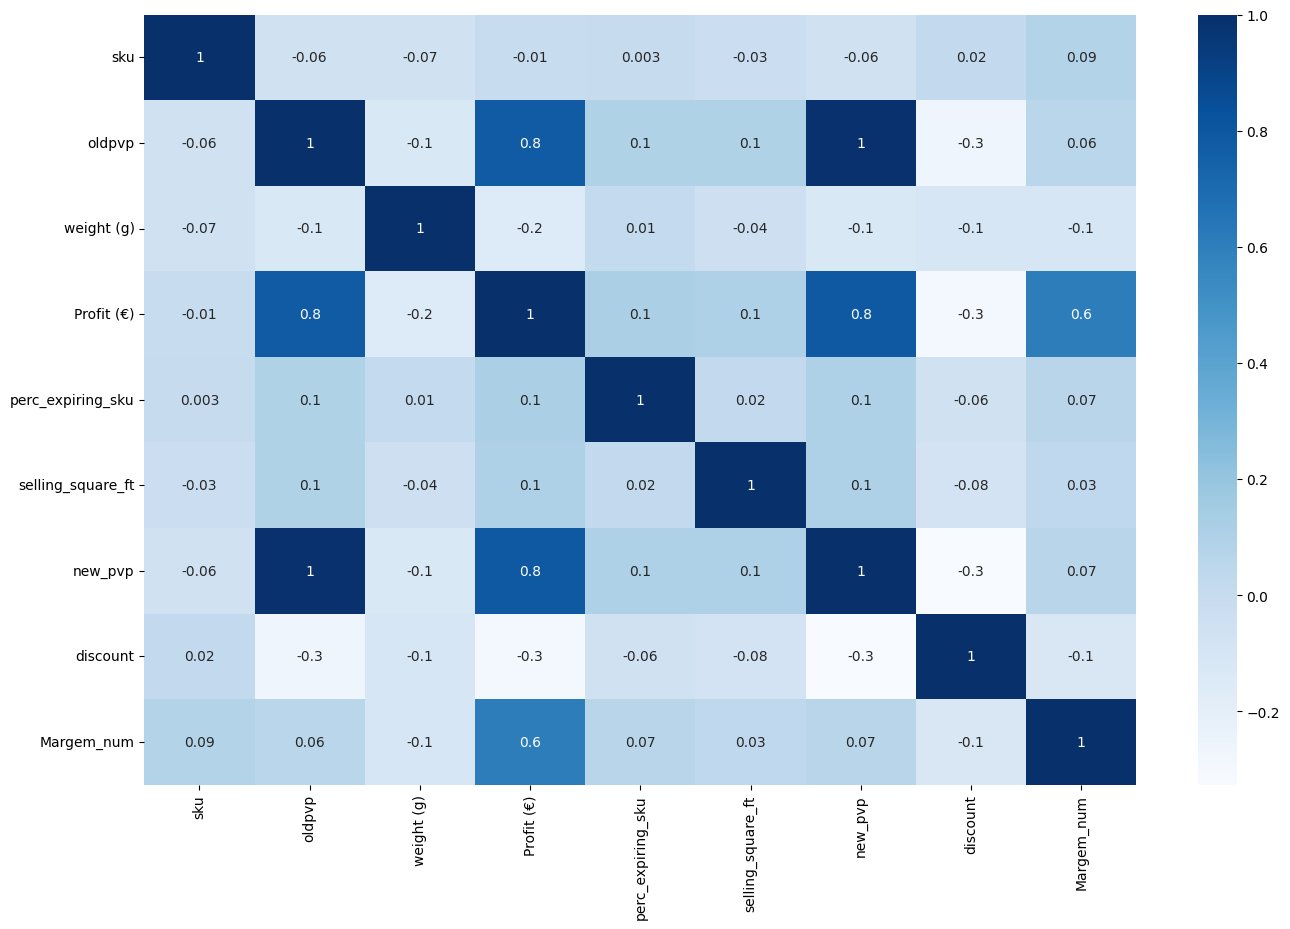

In [1037]:
db_numeric_corr = db_numeric.corr(method = 'spearman',numeric_only=True)
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_numeric_corr, annot=True, fmt = '.1g',cmap='Blues')

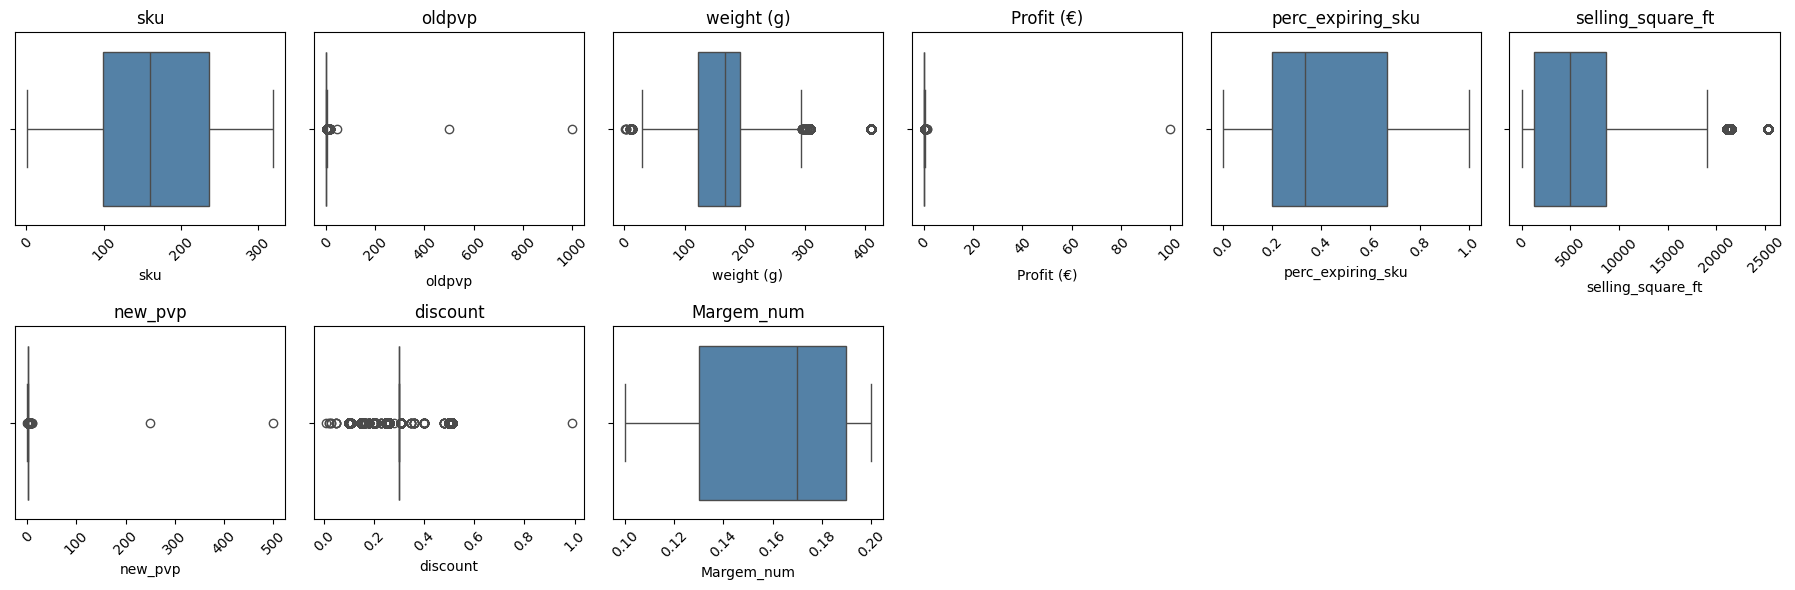

In [1038]:
#Box plot para as numéricas

#Selecicionar apenas as variáveis numéricas
numerical_cols = db_numeric.select_dtypes(include=np.number).columns
num_plots = len(numerical_cols)

# Definir número de colunas e calcular número de linhas
plots_per_row = 6
num_rows = int(np.ceil(num_plots / plots_per_row))

#Criar subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 3, num_rows * 3))

axes = axes.flatten()

#Criar boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=db[col], ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remover eixos vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#Adjustar layout
plt.tight_layout()
plt.show()

<Axes: xlabel='perc_expiring_sku', ylabel='discount'>

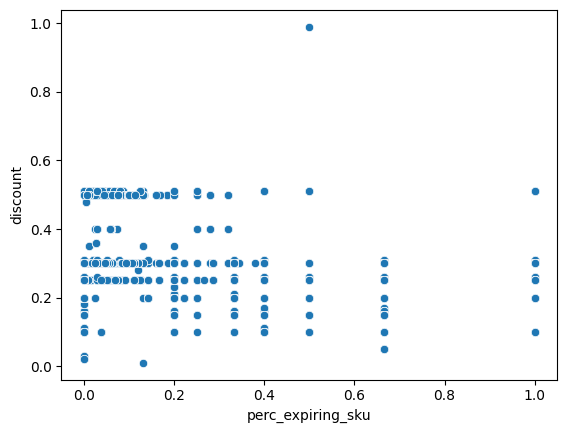

In [1039]:
sns.scatterplot(data = db, x = 'perc_expiring_sku', y= 'discount')

###2.2.2 Variáveis Categóricas

In [1040]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'Payment_method', 'Profit (€)', 'perc_expiring_sku', 'expiring_date',
       'labelling_date', 'sell_date', 'sold', 'type', 'selling_square_ft',
       'district', 'new_pvp', 'discount', 'Margem_num'],
      dtype='object')

<Axes: xlabel='count', ylabel='district'>

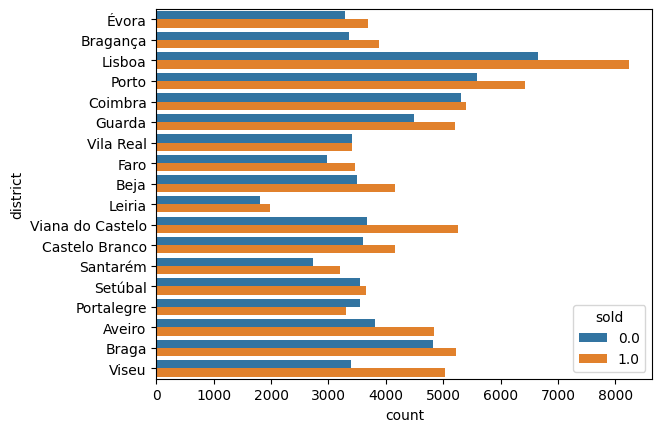

In [1041]:
sns.countplot(y = 'district', hue = 'sold', data = db)

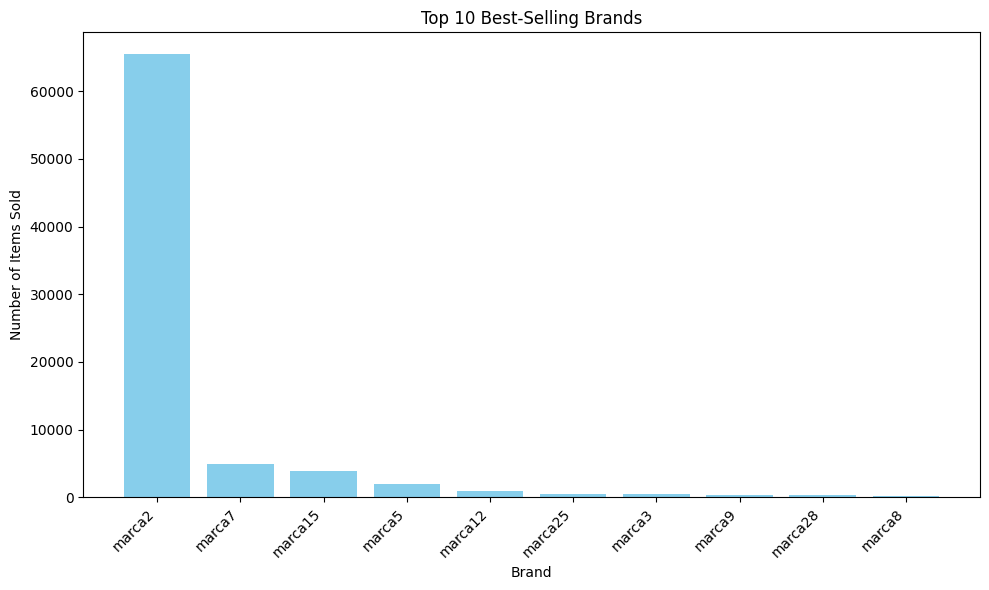

In [1042]:
# prompt: mostra-me um histograma com as 10 brand's mais vendidas (sold = sim)

# Assuming 'db' DataFrame from the previous code is available

# Filter for sold items
sold_items = db[db['sold'] == 1]

# Count the occurrences of each brand among sold items
top_brands = sold_items['brand'].value_counts().nlargest(10)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_brands.index, top_brands.values, color='skyblue')
plt.xlabel("Brand")
plt.ylabel("Number of Items Sold")
plt.title("Top 10 Best-Selling Brands")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [1043]:
# prompt: mostra-me um histograma com as 10 sku's mais vendidas (sold = sim)

# Assuming 'db' DataFrame from the previous code is available

# Filter for sold items
sold_items = db[db['sold'] == 1]

# Count the occurrences of each brand among sold items
top_artigos = sold_items['sku'].value_counts(ascending=False)

top_artigos.head(20)


,count
sku,
227,6902
105,5158
8,3588
198,3482
99,3430
251,3383
293,3030
302,2857
200,2845


In [1044]:
db_categoric.columns

Index(['idstore', 'brand', 'labelqty', 'Payment_method', 'sold', 'type',
       'district'],
      dtype='object')

<ipython-input-1045-19ae732471ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SKU", y="Valor", data=db2.sort_values("Valor", ascending=False), palette="viridis")


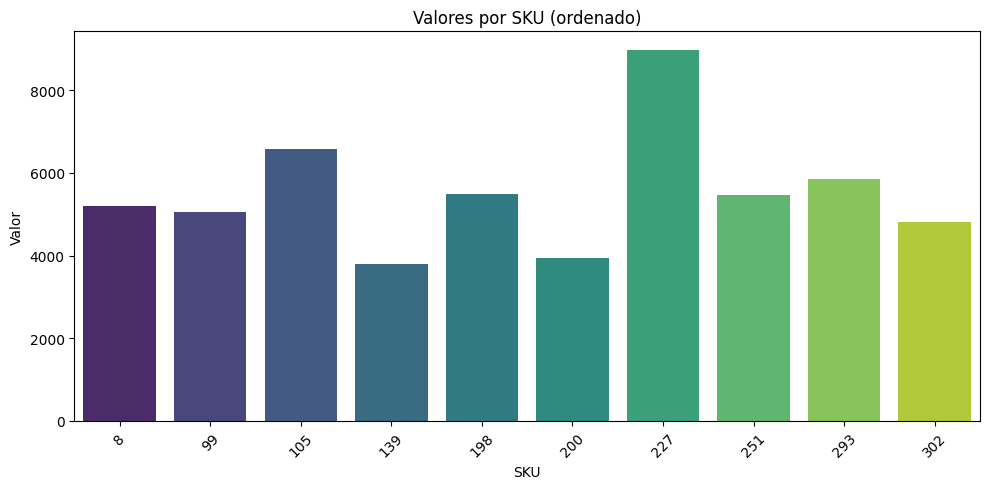

In [1045]:
data = {
    "SKU": [227, 105, 293, 198, 251, 8, 99, 302, 200, 139],
    "Valor": [8971, 6568, 5852, 5478, 5464, 5195, 5045, 4822, 3937, 3799]
}
db2 = pd.DataFrame(data)

# Gráfico de barras ordenado
plt.figure(figsize=(10, 5))
sns.barplot(x="SKU", y="Valor", data=db2.sort_values("Valor", ascending=False), palette="viridis")
plt.title("Valores por SKU (ordenado)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1046]:
# prompt: cria-me uma coluna na tabela db que seja o dia de selling (por exemplo, se for 23 de janeiro de 2021, quero que nessa coluna tenha o valor 23)

# Convert 'sell_date' to datetime objects if not already
# Extract the day of the month from the 'sell_date' column
db['selling_day'] = db['sell_date'].dt.day



In [1047]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16,2.0
1,1,1,marca1,3.96,1,260.0,,0.32,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5,0.16,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16,3.0
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16,2.0
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5,0.16,3.0


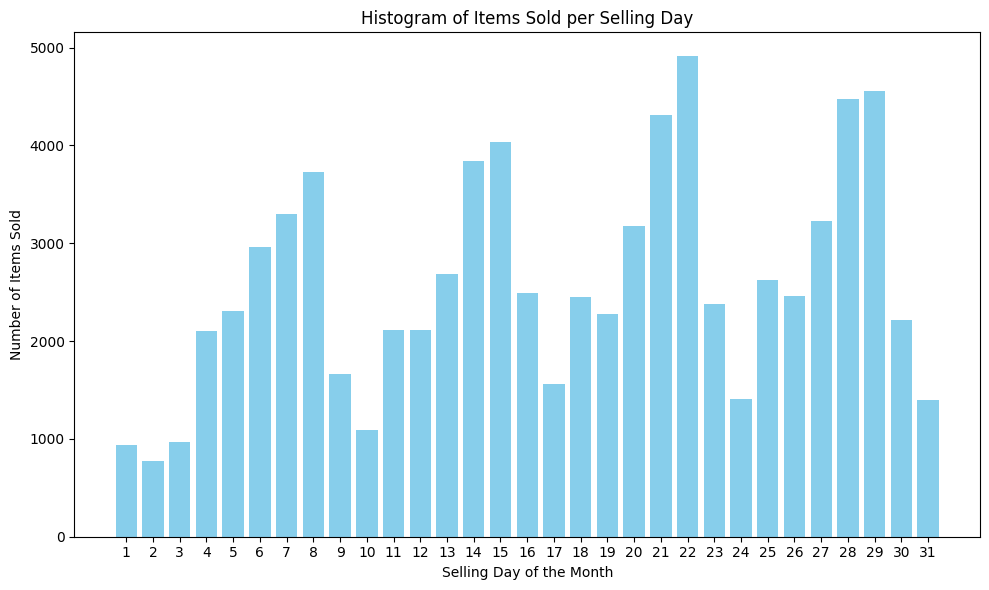

In [1048]:
# prompt: quero fazer um histograma de count de sold=1 por selling day

# Group by 'selling_day' and count occurrences where 'sold' is 1
sold_counts_by_day = db[db['sold'] == 1].groupby('selling_day')['sold'].count()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(sold_counts_by_day.index, sold_counts_by_day.values, color='skyblue')
plt.xlabel("Selling Day of the Month")
plt.ylabel("Number of Items Sold")
plt.title("Histogram of Items Sold per Selling Day")
plt.xticks(sold_counts_by_day.index)  # Use the actual selling days as x-ticks
plt.tight_layout()
plt.show()


In [1049]:
# prompt: dá para fazer uma coluna na qual tenha o dia da semana?

# Assuming 'db' DataFrame from the previous code is available

# Convert 'sell_date' to datetime objects if not already
# ... (Your existing code to handle date conversions)

# Extract the day of the week from the 'sell_date' column
db['selling_day_of_week'] = db['sell_date'].dt.day_name()

db.head()


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16,2.0,Saturday
1,1,1,marca1,3.96,1,260.0,,0.32,0.005025,2021-10-02,...,NaT,0.0,Large,4762.0,Évora,1.98,0.5,0.16,NaN,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16,3.0,Sunday
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16,2.0,Saturday
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday


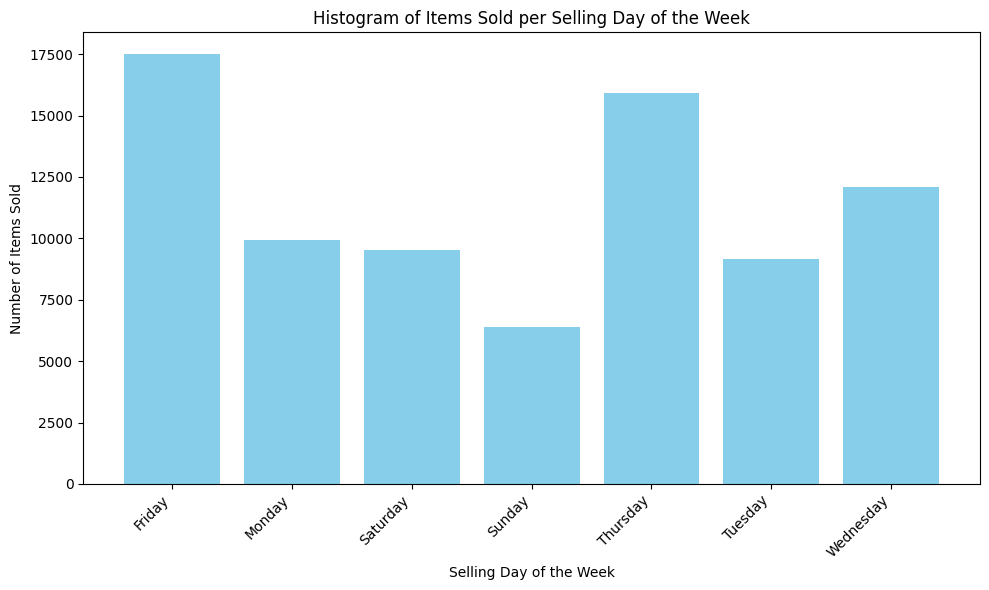

In [1050]:
# prompt: quero fazer um histograma de count de sold=1 por selling_day_of_week

# Group by 'selling_day_of_week' and count occurrences where 'sold' is 1
sold_counts_by_day_of_week = db[db['sold'] == 1].groupby('selling_day_of_week')['sold'].count()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(sold_counts_by_day_of_week.index, sold_counts_by_day_of_week.values, color='skyblue')
plt.xlabel("Selling Day of the Week")
plt.ylabel("Number of Items Sold")
plt.title("Histogram of Items Sold per Selling Day of the Week")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [1051]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,125
expiring_date,0


In [1052]:
db['sold'].value_counts()

,count
sold,
1.0,80511
0.0,69487


# 3. Data Cleaning

## 3.1 Outliers

com base na kurtosis, reparámos que deviamos prestar especial atenção a estes:
oldpvp, profit, new_pvp, discount com kurt superior a 3, indicando uma distribuição bastante anormal, todas positivas e com a cauda para a direita

### oldpvp e newpvp

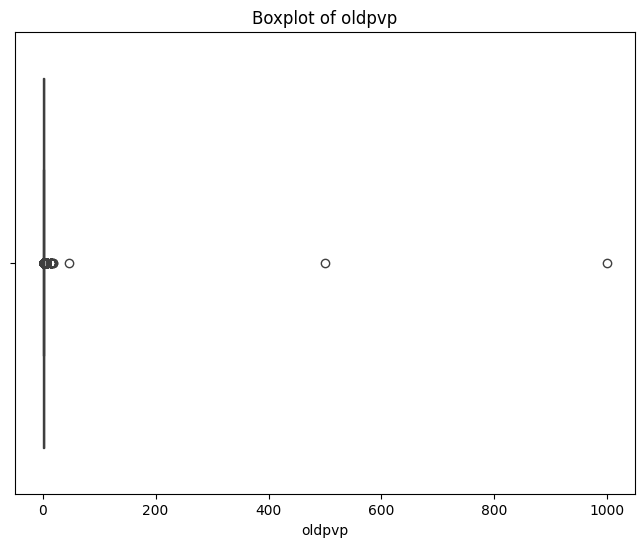

In [1053]:
# prompt: faz-me boxplot de oldpvp


# Assuming 'db' DataFrame from the previous code is available

plt.figure(figsize=(8, 6))
sns.boxplot(x=db['oldpvp'])
plt.title('Boxplot of oldpvp')
plt.show()


In [1054]:
# prompt: mostra-me quais são as linhas cujo valor de old pvp é superior a 400

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame to include only rows where 'oldpvp' is greater than 400
filtered_db = db[db['oldpvp'] > 400]

# Display the filtered DataFrame
filtered_db


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,500.0,1,134.0,Card,0.33,0.250000,2021-10-30,...,2021-10-29,1.0,Medium,7879.0,Santarém,250.0,0.5,0.17,29.0,Friday
50171,289,108,marca20,999.0,1,227.0,,99.90,0.101266,2021-10-10,...,NaT,0.0,Small,342.0,Viana do Castelo,499.5,0.5,0.20,NaN,NaN


In [1055]:
# prompt: mostra-me a média dos oldpvp dos produtos que têm SKU 4 e depois dos que têm sku 108

# Calculate the average 'oldpvp' for products with SKU 4
avg_oldpvp_sku4 = db[db['sku'] == 4]['oldpvp'].mean()
print(f"Average 'oldpvp' for SKU 4: {avg_oldpvp_sku4}")

# Calculate the average 'oldpvp' for products with SKU 108
avg_oldpvp_sku108 = db[db['sku'] == 108]['oldpvp'].mean()
print(f"Average 'oldpvp' for SKU 108: {avg_oldpvp_sku108}")


Average 'oldpvp' for SKU 4: 3.975131578947368
Average 'oldpvp' for SKU 108: 999.0


In [1056]:
# prompt: mostra-me todos as linhas com sku 108

# Assuming 'db' DataFrame from the previous code is available

# Display rows where 'sku' is 108
print(db[db['sku'] == 108])


      idstore  sku    brand  oldpvp labelqty  weight (g) Payment_method  \
50171     289  108  marca20   999.0        1       227.0                  

       Profit (€)  perc_expiring_sku expiring_date  ... sell_date sold   type  \
50171        99.9           0.101266    2021-10-10  ...       NaT  0.0  Small   

      selling_square_ft          district new_pvp  discount  Margem_num  \
50171             342.0  Viana do Castelo   499.5       0.5         0.2   

       selling_day  selling_day_of_week  
50171          NaN                  NaN  

[1 rows x 21 columns]


uma vez que só existe um valor com deste produto (SKU), vamos eliminar esta linha, uma vez que distorce a distribuição dos valores e aparenta ser um erro - etiquetas cor-de-rosa são geralmente aplicadas a produtos perecíveis e não parece que um produto deste género possa ter um valor tão elevado

In [1057]:
# prompt: faz-me drop das linhas onde o sku é 108

# Drop rows where 'sku' is 108
db = db[db['sku'] != 108]


In [1058]:
# prompt: # prompt: mostra-me a média dos oldpvp dos produtos que têm SKU 4 , por marca

# Group by 'brand' and 'sku', then calculate the mean of 'oldpvp' for sku == 4
average_oldpvp_by_brand = db[db['sku'] == 4].groupby('brand')['oldpvp'].mean()

average_oldpvp_by_brand


,oldpvp
brand,
marca3,3.975132


In [1059]:
print(db[db['sku'] == 4])

    idstore  sku   brand  oldpvp labelqty  weight (g) Payment_method  \
121      13    4  marca3    2.79        1       134.0           Card   
122      13    4  marca3    2.79        1       134.0           Cash   
123      13    4  marca3    2.79        1       134.0           Cash   
124      13    4  marca3    2.79        1       134.0           Cash   
125      13    4  marca3    2.79        1       134.0           Card   
..      ...  ...     ...     ...      ...         ...            ...   
572      87    4  marca3    2.79        1       134.0           Cash   
573      87    4  marca3    2.79        1       134.0                  
574      87    4  marca3    2.79        1       134.0                  
575      88    4  marca3    2.79        1       134.0           Cash   
576      88    4  marca3    2.79        1       134.0           Card   

     Profit (€)  perc_expiring_sku expiring_date  ...  sell_date sold    type  \
121        0.33               0.25    2021-10-16  ... 

In [1060]:
# prompt: quero os value_counts dos oldpvp dos produtos com SKU 4

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame for products with SKU 4
sku4_data = db[db['sku'] == 4]

# Calculate value counts for 'oldpvp' for SKU 4
oldpvp_value_counts = sku4_data['oldpvp'].value_counts()

oldpvp_value_counts


,count
oldpvp,
2.79,454
500.00,1
46.00,1


In [1061]:
# Calcular a moda de 'oldpvp' e 'new_pvp' para produtos com sku = 4
mode_oldpvp_sku4 = db[db['sku'] == 4]['oldpvp'].mode()[0]
mode_new_pvp_sku4 = db[db['sku'] == 4]['new_pvp'].mode()[0]
# Guardar a condição antes de alterar
cond = (db['sku'] == 4) & (db['oldpvp'].isin([500, 46]))
# Substituir os valores
db.loc[cond, 'oldpvp'] = mode_oldpvp_sku4
db.loc[cond, 'new_pvp'] = mode_new_pvp_sku4


In [1062]:
# prompt: dá-me os value counts no db, de oldpvp, de quando o sku=4

oldpvp_value_counts = db[db['sku'] == 4]['oldpvp'].value_counts()
oldpvp_value_counts


,count
oldpvp,
2.79,456


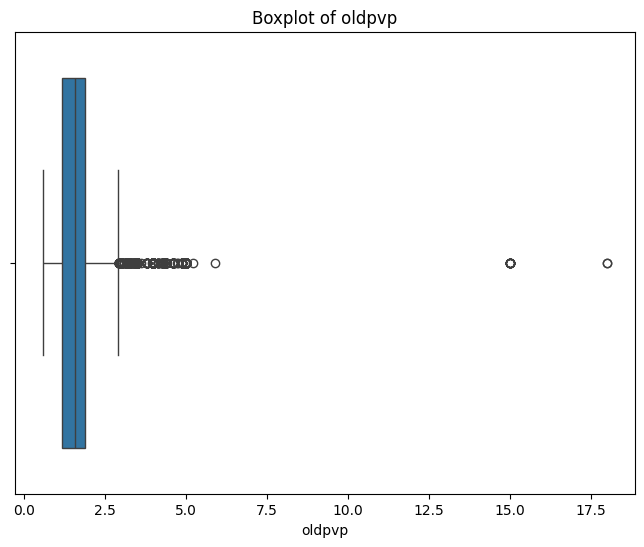

In [1063]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['oldpvp'])
plt.title('Boxplot of oldpvp')
plt.show()

In [1064]:
# prompt: mostra-me os valores cujo oldpvp é superior a 12.5

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame to include only rows where 'oldpvp' is greater than 12.5
filtered_db2 = db[db['oldpvp'] > 12.5]

# Display the filtered DataFrame
filtered_db2


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
11030,14,33,marca14,17.99,1,266.0,Cash,1.44,0.050505,2021-10-27,...,2021-10-23,1.0,Large,21275.0,Beja,8.99,0.5,0.16,23.0,Saturday
11031,14,33,marca14,17.99,1,266.0,,1.44,0.050505,2021-10-27,...,NaT,0.0,Large,21275.0,Beja,8.99,0.5,0.16,NaN,NaN
94319,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94320,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,1.0,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94321,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,1.0,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94322,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94323,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94324,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94325,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94326,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN


In [1065]:
# prompt: mostra-me todos os value_counts de oldpvp de todos os produtos com sku 33

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame for products with sku 33
sku33_data = db[db['sku'] == 33]

# Calculate value counts for 'oldpvp' for sku 33
oldpvp_value_counts_sku33 = sku33_data['oldpvp'].value_counts()

# Print the value counts
oldpvp_value_counts_sku33


,count
oldpvp,
17.99,2


In [1066]:
# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame for products with sku 201
sku201_data = db[db['sku'] == 201]

# Calculate value counts for 'oldpvp' for sku 201
oldpvp_value_counts_sku201 = sku201_data['oldpvp'].value_counts()

# Print the value counts
oldpvp_value_counts_sku201

,count
oldpvp,
14.99,11


In [1067]:
# prompt: mostra-me os sku's que têm mais do que 1 resultado no value_count de oldpvp para cada marca

# Group by 'brand' and 'sku', then count the occurrences of each 'oldpvp' value
oldpvp_counts = db.groupby(['sku','brand'])['oldpvp'].value_counts()

# Filter for SKUs with more than one 'oldpvp' value
skus_with_multiple_oldpvps = oldpvp_counts[oldpvp_counts > 1]

# Print the results
skus_with_multiple_oldpvps


,,,count
sku,brand,oldpvp,
1,marca1,4.62,3
2,marca2,3.19,101
3,marca2,2.65,5
4,marca3,2.79,456
5,marca4,2.79,37
...,...,...,...
315,marca2,2.99,4
316,marca2,0.69,7
317,marca22,0.99,16


In [1068]:
# prompt: mostra-me todas as linhas com sku=1 e brand =marca1

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame for rows where 'sku' is 1 and 'brand' is 'marca1'
filtered_df4 = db[(db['sku'] == 1) & (db['brand'] == 'marca1')]

# Display the filtered rows
filtered_df4


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16,2.0,Saturday
1,1,1,marca1,3.96,1,260.0,,0.32,0.005025,2021-10-02,...,NaT,0.0,Large,4762.0,Évora,1.98,0.5,0.16,NaN,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16,3.0,Sunday
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16,2.0,Saturday
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday
5,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday
6,1,1,marca1,3.42,1,260.0,Cash,0.27,0.005025,2021-10-02,...,2021-10-02,1.0,Large,4762.0,Évora,1.71,0.5,0.16,2.0,Saturday
7,1,1,marca1,3.62,1,260.0,Card,0.29,0.005025,2021-10-02,...,2021-10-02,1.0,Large,4762.0,Évora,1.81,0.5,0.16,2.0,Saturday
8,1,1,marca1,4.62,1,260.0,,0.37,0.005025,2021-10-02,...,NaT,0.0,Large,4762.0,Évora,2.31,0.5,0.16,NaN,NaN
9,1,1,marca1,4.38,1,260.0,Card,0.35,0.010050,2021-10-03,...,2021-10-02,1.0,Large,4762.0,Évora,2.19,0.5,0.16,2.0,Saturday


In [1069]:
# Ver valores distintos de oldpvp por combinação de SKU e BRAND
precos_por_sku_brand = db.groupby(['sku', 'brand'])['oldpvp'].unique().reset_index()
# Renomear a coluna para clareza
precos_por_sku_brand.columns = ['SKU', 'Brand', 'Valores de Preço']
print(precos_por_sku_brand)

     SKU    Brand                                   Valores de Preço
0      1   marca1  [4.22, 3.96, 4.74, 4.2, 4.62, 3.42, 3.62, 4.38...
1      2   marca2                                        [3.19, nan]
2      3   marca2                                             [2.65]
3      4   marca3                                             [2.79]
4      5   marca4                                       [2.79, 2.99]
..   ...      ...                                                ...
313  315   marca2                                       [2.99, 3.09]
314  316   marca2                                       [0.69, 0.89]
315  317  marca22                                             [0.99]
316  318   marca2                                             [2.49]
317  319  marca24                                             [3.49]

[318 rows x 3 columns]


In [1070]:
# prompt: vai ao precos_por_sku_brand e calcula-me a amplitude do maior valor de preço para cada um, para o menor, e depois faz-me uma lista descendente disso

# Calculate the range of prices for each SKU and brand
precos_por_sku_brand['Amplitude de Preço'] = precos_por_sku_brand['Valores de Preço'].apply(lambda x: np.max(x) - np.min(x) if len(x) > 1 else 0)

# Sort the DataFrame by price range in descending order
precos_por_sku_brand = precos_por_sku_brand.sort_values('Amplitude de Preço', ascending=False)

# Display the result
precos_por_sku_brand


,SKU,Brand,Valores de Preço,Amplitude de Preço
120,122,marca2,"[0.96, 0.98, 0.97, 0.99, 0.95, 1.0, 4.29]",3.34
0,1,marca1,"[4.22, 3.96, 4.74, 4.2, 4.62, 3.42, 3.62, 4.38...",2.47
174,176,marca10,"[1.12, 1.47, 1.22, 1.71, 1.36, 1.68, 1.05, 1.7...",1.26
91,92,marca2,"[2.89, 1.69]",1.20
68,69,marca7,"[1.99, 2.8]",0.81
...,...,...,...,...
133,135,marca2,"[2.99, nan]",NaN
289,291,marca2,"[1.29, 0.99, 1.44, nan]",NaN
291,293,marca2,"[1.69, nan]",NaN
292,294,marca15,"[1.99, nan]",NaN


### weight

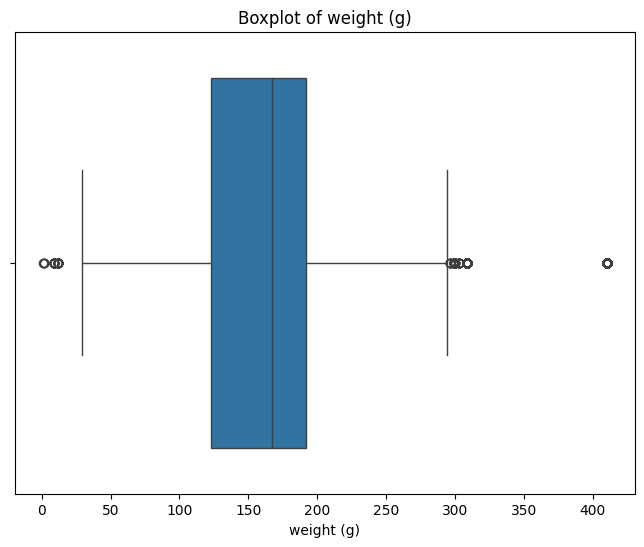

In [1071]:
# prompt: mostra-me o boxplot de weight

plt.figure(figsize=(8, 6))
sns.boxplot(x=db['weight (g)'])
plt.title('Boxplot of weight (g)')
plt.show()


In [1072]:
# prompt: mostra-me os valores que estão acima de 350 no weight

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame to include only rows where 'weight (g)' is greater than 350
filtered_db_weight = db[db['weight (g)'] > 350]

# Display the filtered DataFrame
filtered_db_weight


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
114940,14,247,marca7,1.99,1,410.0,Card,0.28,1.0,2021-10-08,...,2021-10-07,1.0,Large,21275.0,Beja,1.39,0.3,0.2,7.0,Thursday
114941,14,247,marca7,1.99,1,410.0,Cash,0.28,0.5,2021-10-22,...,2021-10-21,1.0,Large,21275.0,Beja,1.39,0.3,0.2,21.0,Thursday
114942,14,247,marca7,1.99,1,410.0,Cash,0.28,0.5,2021-10-22,...,2021-10-22,1.0,Large,21275.0,Beja,1.39,0.3,0.2,22.0,Friday
114943,14,247,marca7,1.99,1,410.0,Cash,0.28,1.0,2021-10-18,...,2021-10-17,1.0,Large,21275.0,Beja,1.39,0.3,0.2,17.0,Sunday
114944,14,247,marca7,1.99,1,410.0,Card,0.28,1.0,2021-10-18,...,2021-10-18,1.0,Large,21275.0,Beja,1.39,0.3,0.2,18.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116426,285,247,marca7,1.99,1,410.0,,0.28,1.0,2021-10-18,...,NaT,0.0,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN
116427,285,247,marca7,1.99,1,410.0,,0.28,1.0,2021-10-18,...,NaT,0.0,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN
116428,285,247,marca7,1.99,1,410.0,,0.28,1.0,2021-10-18,...,NaT,0.0,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN
116429,285,247,marca7,1.99,1,410.0,,0.28,1.0,2021-10-18,...,NaT,0.0,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN


In [1073]:
filtered_db_weight['sku'].value_counts()

,count
sku,
247,1491


tendo em consideração que todos os produtos com sku têm o mesmo peso, não aparenta ser um erro, pelo que não será tratado

In [1074]:
# prompt: mostra-me os valores que estão abaixo de 20 no weight

# Assuming 'db' DataFrame from the previous code is available


filtered_db_weight2 = db[db['weight (g)'] < 20]

# Display the filtered DataFrame
filtered_db_weight2

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
57860,127,125,marca5,4.29,1,9.0,Cash,0.24,0.040404,2021-10-27,...,2021-10-23,1.0,Medium,6748.0,Faro,2.14,0.5,0.11,23.0,Saturday
57861,127,125,marca5,4.29,1,9.0,Cash,0.24,0.040404,2021-10-27,...,2021-10-27,1.0,Medium,6748.0,Faro,2.14,0.5,0.11,27.0,Wednesday
57862,127,125,marca5,4.29,1,9.0,Card,0.24,0.040404,2021-10-27,...,2021-10-27,1.0,Medium,6748.0,Faro,2.14,0.5,0.11,27.0,Wednesday
57863,127,125,marca5,4.29,1,9.0,,0.24,0.040404,2021-10-27,...,NaT,0.0,Medium,6748.0,Faro,2.14,0.5,0.11,NaN,NaN
57864,101,125,marca5,4.29,1,9.0,Cash,0.24,0.080808,2021-10-26,...,2021-10-19,1.0,Medium,5223.0,Santarém,2.14,0.5,0.11,19.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149524,152,308,marca16,1.99,1,12.0,Card,0.16,0.020661,2021-10-26,...,2021-10-25,1.0,Small,686.0,Évora,0.99,0.5,0.16,25.0,Monday
149525,152,308,marca16,1.99,1,12.0,Cash,0.16,0.020661,2021-10-26,...,2021-10-25,1.0,Small,686.0,Évora,0.99,0.5,0.16,25.0,Monday
149526,185,308,marca16,1.99,1,12.0,,0.16,0.000000,2021-10-27,...,NaT,0.0,Small,136.0,Setúbal,0.99,0.5,0.16,NaN,NaN
149527,185,308,marca16,1.99,1,12.0,,0.16,0.000000,2021-10-27,...,NaT,0.0,Small,136.0,Setúbal,0.99,0.5,0.16,NaN,NaN


In [1075]:
filtered_db_weight2['sku'].value_counts()

,count
sku,
308,34
125,24
260,3
178,1


In [1076]:
filtrado308 = db[db['sku'] == 308]
filtrado308['weight (g)'].value_counts()

,count
weight (g),
12.0,34


In [1077]:
filtrado125 = db[db['sku'] == 125]
filtrado125['weight (g)'].value_counts()

,count
weight (g),
9.0,24


In [1078]:
filtrado260 = db[db['sku'] == 260]
filtrado260['weight (g)'].value_counts()

,count
weight (g),
2.0,3


### profit

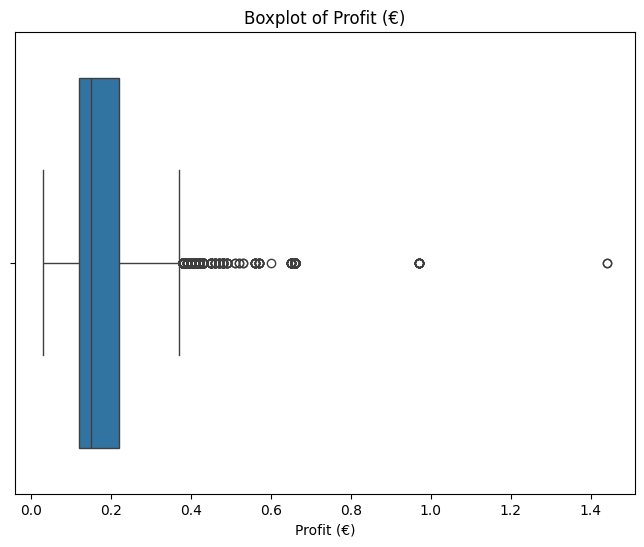

In [1079]:
# prompt: faz-me um boxplot de profit

plt.figure(figsize=(8, 6))
sns.boxplot(x=db['Profit (€)'])
plt.title('Boxplot of Profit (€)')
plt.show()


In [1080]:
# prompt: mostra-me os casos em que o profit é superior a 0.8

# Assuming 'db' DataFrame from the previous code is available

# Filter the DataFrame to include only rows where 'Profit (€)' is greater than 0.8
profit_greater_than_08 = db[db['Profit (€)'] > 0.8]

# Display the filtered DataFrame
profit_greater_than_08


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
11030,14,33,marca14,17.99,1,266.0,Cash,1.44,0.050505,2021-10-27,...,2021-10-23,1.0,Large,21275.0,Beja,8.99,0.5,0.16,23.0,Saturday
11031,14,33,marca14,17.99,1,266.0,,1.44,0.050505,2021-10-27,...,NaT,0.0,Large,21275.0,Beja,8.99,0.5,0.16,NaN,NaN
94319,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94320,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,1.0,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94321,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,1.0,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94322,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94323,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94324,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94325,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94326,7,201,marca5,14.99,1,166.0,,0.97,0.030641,2021-10-28,...,NaT,0.0,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN


In [1081]:
# Ver valores distintos de profit por combinação de SKU e BRAND
profit_por_sku_brand = db.groupby(['sku', 'brand'])['Profit (€)'].unique().reset_index()
# Renomear a coluna para clareza
profit_por_sku_brand.columns = ['SKU', 'Brand', 'Profit (€)']
print(profit_por_sku_brand)

     SKU    Brand                                         Profit (€)
0      1   marca1  [0.34, 0.32, 0.38, 0.37, 0.27, 0.29, 0.35, 0.4...
1      2   marca2                                 [0.24, 0.36, 0.38]
2      3   marca2                                             [0.24]
3      4   marca3                                       [0.33, 0.36]
4      5   marca4                                 [0.33, 0.36, 0.38]
..   ...      ...                                                ...
313  315   marca2                                             [0.18]
314  316   marca2                                       [0.04, 0.08]
315  317  marca22                                        [0.14, 0.1]
316  318   marca2                                       [0.14, 0.19]
317  319  marca24                                             [0.46]

[318 rows x 3 columns]


In [1082]:

# Calculate the range of prices for each SKU and brand
profit_por_sku_brand['Amplitude de Preço'] = profit_por_sku_brand['Profit (€)'].apply(lambda x: np.max(x) - np.min(x) if len(x) > 1 else 0)

# Sort the DataFrame by price range in descending order
profit_por_sku_brand = profit_por_sku_brand.sort_values('Amplitude de Preço', ascending=False)

# Display the result
profit_por_sku_brand

,SKU,Brand,Profit (€),Amplitude de Preço
120,122,marca2,"[0.13, 0.57]",0.44
91,92,marca2,"[0.38, 0.41, 0.47, 0.49, 0.22]",0.27
77,78,marca2,"[0.3, 0.42, 0.56]",0.26
112,114,marca2,"[0.4, 0.56, 0.6]",0.20
0,1,marca1,"[0.34, 0.32, 0.38, 0.37, 0.27, 0.29, 0.35, 0.4...",0.20
...,...,...,...,...
311,313,marca2,[0.12],0.00
313,315,marca2,[0.18],0.00
312,314,marca2,[0.12],0.00
2,3,marca2,[0.24],0.00


### discount

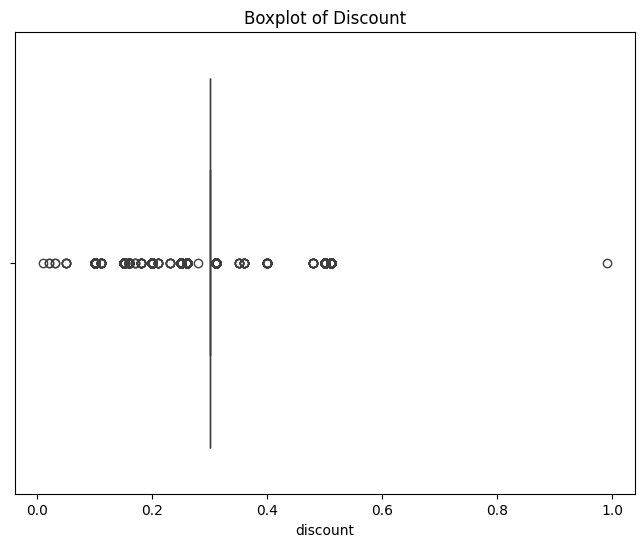

In [1083]:
# prompt: faz-me boxplot de discount

# Assuming 'db' DataFrame from the previous code is available

plt.figure(figsize=(8, 6))
sns.boxplot(x=db['discount'])
plt.title('Boxplot of Discount')
plt.show()


In [1084]:
# prompt: mostra-me a linha em que o valor de discount é superior a 0.8

# Assuming 'db' DataFrame from the previous code is available

# Display rows where 'discount' is greater than 0.8
print(db[db['discount'] > 0.8])


    idstore  sku   brand  oldpvp labelqty  weight (g) Payment_method  \
550      83    4  marca3    2.79        1       134.0                  

     Profit (€)  perc_expiring_sku expiring_date  ... sell_date sold    type  \
550        0.33                0.5    2021-10-09  ...       NaT  0.0  Medium   

    selling_square_ft  district new_pvp  discount  Margem_num  selling_day  \
550            4330.0     Braga    0.03      0.99        0.17          NaN   

     selling_day_of_week  
550                  NaN  

[1 rows x 21 columns]


In [1085]:
# prompt: mostra-me todos os produtos com o sku 4 e brand marca3

# Assuming 'db' DataFrame from the previous code is available

# Filter for products with sku 4 and brand marca3
products_sku4_marca3 = db[(db['sku'] == 4) & (db['brand'] == 'marca3')]

# Display the filtered data
products_sku4_marca3


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
121,13,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-16,...,2021-10-16,1.0,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
122,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,1.0,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
123,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,1.0,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
124,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,1.0,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
125,13,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-16,...,2021-10-16,1.0,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,87,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-07,...,2021-10-07,1.0,Medium,8009.0,Setúbal,1.95,0.3,0.17,7.0,Thursday
573,87,4,marca3,2.79,1,134.0,,0.33,0.25,2021-10-07,...,NaT,0.0,Medium,8009.0,Setúbal,1.95,0.3,0.17,NaN,NaN
574,87,4,marca3,2.79,1,134.0,,0.33,0.25,2021-10-07,...,NaT,0.0,Medium,8009.0,Setúbal,1.95,0.3,0.17,NaN,NaN
575,88,4,marca3,2.79,1,134.0,Cash,0.33,0.50,2021-10-05,...,2021-10-04,1.0,Medium,4854.0,Lisboa,1.95,0.3,0.17,4.0,Monday


In [1086]:
products_sku4_marca3['Profit (€)'].value_counts()

,count
Profit (€),
0.33,429
0.36,27


In [1087]:
products_sku4_marca3['oldpvp'].value_counts()

,count
oldpvp,
2.79,456


In [1088]:
products_sku4_marca3['discount'].value_counts()

,count
discount,
0.30,427
0.25,27
0.50,1
0.99,1


In [1089]:
# prompt: mostra-me as linhas em que o discount é 0.50 ou 0.99

# Assuming 'db' DataFrame from the previous code is available

# Display rows where 'discount' is 0.50 or 0.99
profitestranho = products_sku4_marca3[(products_sku4_marca3['discount'] == 0.50) | (db['discount'] == 0.99)]
profitestranho

<ipython-input-1089-fa74f8317cc9>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  profitestranho = products_sku4_marca3[(products_sku4_marca3['discount'] == 0.50) | (db['discount'] == 0.99)]


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-30,...,2021-10-29,1.0,Medium,7879.0,Santarém,1.95,0.50,0.17,29.0,Friday
550,83,4,marca3,2.79,1,134.0,,0.33,0.50,2021-10-09,...,NaT,0.0,Medium,4330.0,Braga,0.03,0.99,0.17,NaN,NaN


In [1090]:
# prompt: no db, quero alterar o valor do discount destas duas linhas do profitestranho para 0.30

# Assuming 'db' DataFrame and 'profitestranho' DataFrame from the previous code are available.

# Set the 'discount' to 0.30 for the specified rows in 'profitestranho'
db.loc[profitestranho.index, 'discount'] = 0.30

# Verify the changes
db.loc[profitestranho.index]


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-30,...,2021-10-29,1.0,Medium,7879.0,Santarém,1.95,0.3,0.17,29.0,Friday
550,83,4,marca3,2.79,1,134.0,,0.33,0.50,2021-10-09,...,NaT,0.0,Medium,4330.0,Braga,0.03,0.3,0.17,NaN,NaN


In [1091]:
# prompt: no db, quero alterar o valor do new_pvp destas duas linhas do profitestranho para old_pvp - (old_pvp * discount) e arredondar a 2 casas decimais

# Assuming 'db' DataFrame and 'profitestranho' DataFrame from the previous code are available.

# Calculate the new 'new_pvp' values
db.loc[profitestranho.index, 'new_pvp'] = (db.loc[profitestranho.index, 'oldpvp'] -
                                        (db.loc[profitestranho.index, 'oldpvp'] * db.loc[profitestranho.index, 'discount'])).round(2)

# Verify the changes
db.loc[profitestranho.index]


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-30,...,2021-10-29,1.0,Medium,7879.0,Santarém,1.95,0.3,0.17,29.0,Friday
550,83,4,marca3,2.79,1,134.0,,0.33,0.50,2021-10-09,...,NaT,0.0,Medium,4330.0,Braga,1.95,0.3,0.17,NaN,NaN


## 3.2 Missing Values

In [1092]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,125
expiring_date,0


In [977]:
# prompt: mostra-me as linhas em que sold é nulo

# Assuming 'db' DataFrame from the previous code is available

# Display rows where 'sold' is null
soldnulo = db[db['sold'].isnull()]
soldnulo.head()


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
124492,67,254,marca8,1.29,1,309.0,,0.15,0.500000,2021-10-30,...,NaT,NaN,Medium,10084.0,Castelo Branco,0.96,0.26,0.16,NaN,NaN
124494,67,254,marca8,1.29,1,309.0,,0.15,0.500000,2021-10-30,...,NaT,NaN,Medium,10084.0,Castelo Branco,0.96,0.26,0.16,NaN,NaN
124725,25,257,marca2,0.79,1,260.0,,0.07,0.285714,2021-10-08,...,NaT,NaN,Large,14855.0,Porto,0.55,0.30,0.13,NaN,NaN
124732,27,257,marca2,0.79,1,260.0,,0.07,0.142857,2021-10-29,...,NaT,NaN,Large,21060.0,Castelo Branco,0.55,0.30,0.13,NaN,NaN
124737,27,257,marca2,0.79,1,260.0,,0.07,0.142857,2021-10-30,...,NaT,NaN,Large,21060.0,Castelo Branco,0.55,0.30,0.13,NaN,NaN


In [1096]:
db['sold'] = db['sell_date'].notna().astype(int)

In [1098]:
db.shape

(150053, 21)

In [1099]:
db['sold'].value_counts()

,count
sold,
1,80511
0,69542


In [1100]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,125
expiring_date,0


In [1101]:
# prompt: faz-me um fillna para os sell_date, selling_day e selling_day_of_week que seja "NULL"

# Fill NaN values in 'sell_date', 'selling_day', and 'selling_day_of_week' with "NULL"
db['sell_date'] = db['sell_date'].fillna("NULL")
db['selling_day'] = db['selling_day'].fillna("NULL")
db['selling_day_of_week'] = db['selling_day_of_week'].fillna("NULL")


In [1102]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,125
expiring_date,0


In [1105]:
# prompt: mostra-me os perc_expiring_sku que são nulos

# Display rows where 'perc_expiring_sku' is null
percnulo = db[db['perc_expiring_sku'].isnull()]
percnulo

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
13868,89,45,marca18,2.19,1,300.0,Card,0.31,NaN,2021-10-27,...,2021-10-26 00:00:00,1,Medium,5829.0,Lisboa,1.53,0.30,0.20,26.0,Tuesday
13869,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-27,...,2021-10-26 00:00:00,1,Medium,5829.0,Lisboa,1.53,0.30,0.20,26.0,Tuesday
13870,89,45,marca18,2.19,1,300.0,,0.31,NaN,2021-10-27,...,NULL,0,Medium,5829.0,Lisboa,1.53,0.30,0.20,NULL,NULL
13871,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-23,...,2021-10-23 00:00:00,1,Medium,5829.0,Lisboa,1.53,0.30,0.20,23.0,Saturday
13872,89,45,marca18,2.19,1,300.0,,0.31,NaN,2021-10-23,...,NULL,0,Medium,5829.0,Lisboa,1.53,0.30,0.20,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78752,92,176,marca10,1.26,1,193.0,Card,0.12,NaN,2021-10-25,...,2021-10-25 00:00:00,1,Medium,7230.0,Beja,0.94,0.25,0.13,25.0,Monday
78753,92,176,marca10,1.47,1,193.0,Cash,0.14,NaN,2021-10-29,...,2021-10-29 00:00:00,1,Medium,7230.0,Beja,1.10,0.25,0.13,29.0,Friday
78754,92,176,marca10,1.12,1,193.0,Cash,0.11,NaN,2021-10-29,...,2021-10-29 00:00:00,1,Medium,7230.0,Beja,0.84,0.25,0.13,29.0,Friday
78755,92,176,marca10,0.84,1,193.0,Card,0.08,NaN,2021-10-29,...,2021-10-29 00:00:00,1,Medium,7230.0,Beja,0.63,0.25,0.13,29.0,Friday


<Axes: xlabel='sold', ylabel='perc_expiring_sku'>

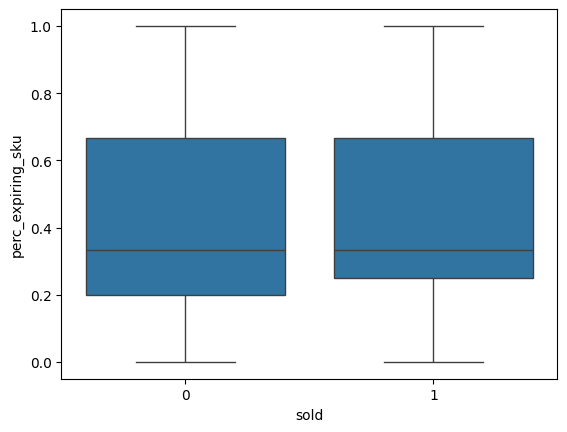

In [1108]:
sns.boxplot(y = 'perc_expiring_sku', x = 'sold', data = db)

In [1109]:
percnulo['sku'].value_counts()

,count
sku,
176,73
149,47
45,5


In [1110]:
percnulo['brand'].value_counts()

,count
brand,
marca10,73
marca12,47
marca18,5


In [1120]:
# prompt: mostra-me as linhas de db em que o sku é 176 e brand é marca10

# Assuming 'db' DataFrame from the previous code is available.

# Display rows where 'sku' is 176 and 'brand' is 'marca10'
sku176marca10 = db[(db['sku'] == 149) & (db['brand'] == 'marca12')]
sku176marca10

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
69819,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69820,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69821,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69822,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69823,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69824,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-02 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,2.0,Saturday
69825,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69826,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69827,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69828,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL


In [1121]:
# prompt: mostra-me as linhas de db em que o sku é 176 e brand é marca10

# Assuming 'db' DataFrame from the previous code is available.

# Display rows where 'sku' is 176 and 'brand' is 'marca10'
sku176marca10 = db[ (db['brand'] == 'marca12')]
sku176marca10

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
10693,132,27,marca12,0.99,1,51.0,Cash,0.06,0.125,2021-10-02,...,2021-10-01 00:00:00,1,Medium,6711.0,Porto,0.49,0.51,0.12,1.0,Friday
10694,132,27,marca12,0.99,1,51.0,Cash,0.06,0.125,2021-10-02,...,2021-10-01 00:00:00,1,Medium,6711.0,Porto,0.49,0.51,0.12,1.0,Friday
10695,132,27,marca12,0.99,1,51.0,Cash,0.06,0.125,2021-10-02,...,2021-10-01 00:00:00,1,Medium,6711.0,Porto,0.49,0.51,0.12,1.0,Friday
10696,132,27,marca12,0.99,1,51.0,,0.06,0.125,2021-10-02,...,NULL,0,Medium,6711.0,Porto,0.49,0.51,0.12,NULL,NULL
10697,132,27,marca12,0.99,1,51.0,,0.06,0.125,2021-10-02,...,NULL,0,Medium,6711.0,Porto,0.49,0.51,0.12,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129956,216,278,marca12,0.99,1,85.0,,0.08,1.000,2021-10-19,...,NULL,0,Small,NaN,Setúbal,0.49,0.51,0.17,NULL,NULL
129957,216,278,marca12,0.99,1,85.0,,0.08,1.000,2021-10-19,...,NULL,0,Small,NaN,Setúbal,0.49,0.51,0.17,NULL,NULL
129958,216,278,marca12,0.99,1,85.0,,0.08,1.000,2021-10-19,...,NULL,0,Small,NaN,Setúbal,0.49,0.51,0.17,NULL,NULL
129959,216,278,marca12,0.99,1,85.0,,0.08,1.000,2021-10-19,...,NULL,0,Small,NaN,Setúbal,0.49,0.51,0.17,NULL,NULL


In [ ]:
sku176marca10['perc_expiring_sku'].value_counts()

,count
perc_expiring_sku,
1.000000,737
0.500000,539
0.000000,227
0.250000,117
0.125000,79
0.031447,14


In [1122]:
sku176marca10['idstore'].value_counts()

,count
idstore,
132,289
217,246
182,222
152,148
184,137
215,115
185,98
212,85
1,83


In [1124]:
db[(db['sku'] == 176)]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
78684,91,176,marca10,1.12,1,193.0,,0.11,NaN,2021-10-31,...,NULL,0,Medium,8952.0,Aveiro,0.84,0.25,0.13,NULL,NULL
78685,91,176,marca10,1.47,1,193.0,,0.13,NaN,2021-10-27,...,NULL,0,Medium,8952.0,Aveiro,1.02,0.31,0.13,NULL,NULL
78686,91,176,marca10,1.47,1,193.0,,0.13,NaN,2021-10-27,...,NULL,0,Medium,8952.0,Aveiro,1.02,0.31,0.13,NULL,NULL
78687,91,176,marca10,1.22,1,193.0,Card,0.11,NaN,2021-10-27,...,2021-10-27 00:00:00,1,Medium,8952.0,Aveiro,0.85,0.30,0.13,27.0,Wednesday
78688,91,176,marca10,1.22,1,193.0,,0.11,NaN,2021-10-27,...,NULL,0,Medium,8952.0,Aveiro,0.85,0.30,0.13,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78752,92,176,marca10,1.26,1,193.0,Card,0.12,NaN,2021-10-25,...,2021-10-25 00:00:00,1,Medium,7230.0,Beja,0.94,0.25,0.13,25.0,Monday
78753,92,176,marca10,1.47,1,193.0,Cash,0.14,NaN,2021-10-29,...,2021-10-29 00:00:00,1,Medium,7230.0,Beja,1.10,0.25,0.13,29.0,Friday
78754,92,176,marca10,1.12,1,193.0,Cash,0.11,NaN,2021-10-29,...,2021-10-29 00:00:00,1,Medium,7230.0,Beja,0.84,0.25,0.13,29.0,Friday
78755,92,176,marca10,0.84,1,193.0,Card,0.08,NaN,2021-10-29,...,2021-10-29 00:00:00,1,Medium,7230.0,Beja,0.63,0.25,0.13,29.0,Friday


In [1125]:
db[(db['sku'] == 149)]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
69819,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69820,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69821,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69822,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69823,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-01 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69824,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-02 00:00:00,1,Small,703.0,Viseu,1.85,0.3,0.12,2.0,Saturday
69825,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69826,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69827,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL
69828,182,149,marca12,2.65,1,202.0,,0.22,NaN,2021-10-02,...,NULL,0,Small,703.0,Viseu,1.85,0.3,0.12,NULL,NULL


In [1126]:
db[(db['sku'] == 45)]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
13868,89,45,marca18,2.19,1,300.0,Card,0.31,NaN,2021-10-27,...,2021-10-26 00:00:00,1,Medium,5829.0,Lisboa,1.53,0.3,0.2,26.0,Tuesday
13869,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-27,...,2021-10-26 00:00:00,1,Medium,5829.0,Lisboa,1.53,0.3,0.2,26.0,Tuesday
13870,89,45,marca18,2.19,1,300.0,,0.31,NaN,2021-10-27,...,NULL,0,Medium,5829.0,Lisboa,1.53,0.3,0.2,NULL,NULL
13871,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-23,...,2021-10-23 00:00:00,1,Medium,5829.0,Lisboa,1.53,0.3,0.2,23.0,Saturday
13872,89,45,marca18,2.19,1,300.0,,0.31,NaN,2021-10-23,...,NULL,0,Medium,5829.0,Lisboa,1.53,0.3,0.2,NULL,NULL


In [ ]:
#VER PERC EXPIRING SKU POR LOJA